In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, median_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Membaca data csv
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [4]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

# Data Wrangling

In [5]:
# Memasukan data boston ke dataframe
df = pd.DataFrame(data = boston['data'], columns = boston['feature_names'])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
# Membuat nilai variabel dan kolom baru untuk nilai target 
target = pd.Series(boston['target'])
df['Price'] = target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
# Mengecek tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [8]:
# Mengecek nilai kosong
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [9]:
# Melihat nilai statistik
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [10]:
bsDesc = []

for i in df.columns:
    bsDesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round((df[i].isna().sum() / len(df)) * 100, 2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])

In [11]:
pd.DataFrame(data = bsDesc,
            columns=[
                'Features',
                'DataType',
                'Null',
                'NullPercentage',
                'Unique',
                'UniqueSample'
            ])

,Features,DataType,Null,NullPercentage,Unique,UniqueSample
0,CRIM,float64,0,0.0,504,"[0.06047, 0.16902]"
1,ZN,float64,0,0.0,26,"[22.0, 52.5]"
2,INDUS,float64,0,0.0,76,"[3.64, 3.37]"
3,CHAS,float64,0,0.0,2,"[1.0, 0.0]"
4,NOX,float64,0,0.0,81,"[0.871, 0.51]"
5,RM,float64,0,0.0,446,"[6.092, 6.968]"
6,AGE,float64,0,0.0,356,"[45.4, 70.6]"
7,DIS,float64,0,0.0,412,"[2.0407, 3.0993]"
8,RAD,float64,0,0.0,9,"[2.0, 3.0]"
9,TAX,float64,0,0.0,66,"[345.0, 437.0]"


- Cek Outlier

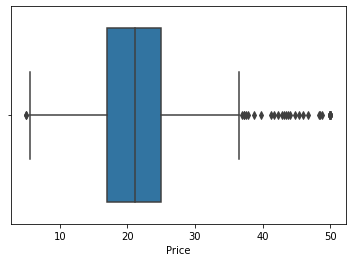

In [12]:
sns.boxplot(df['Price'])
plt.show()

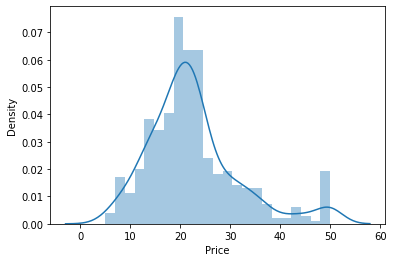

In [13]:
sns.distplot(df['Price'])
plt.show()

- Dari grafik di atas terdapat outlier yang menyebabkan data tidak berdistribusi normal. Jika dilihat outliernya berapa pada price 30 sampai dengan price 50. 

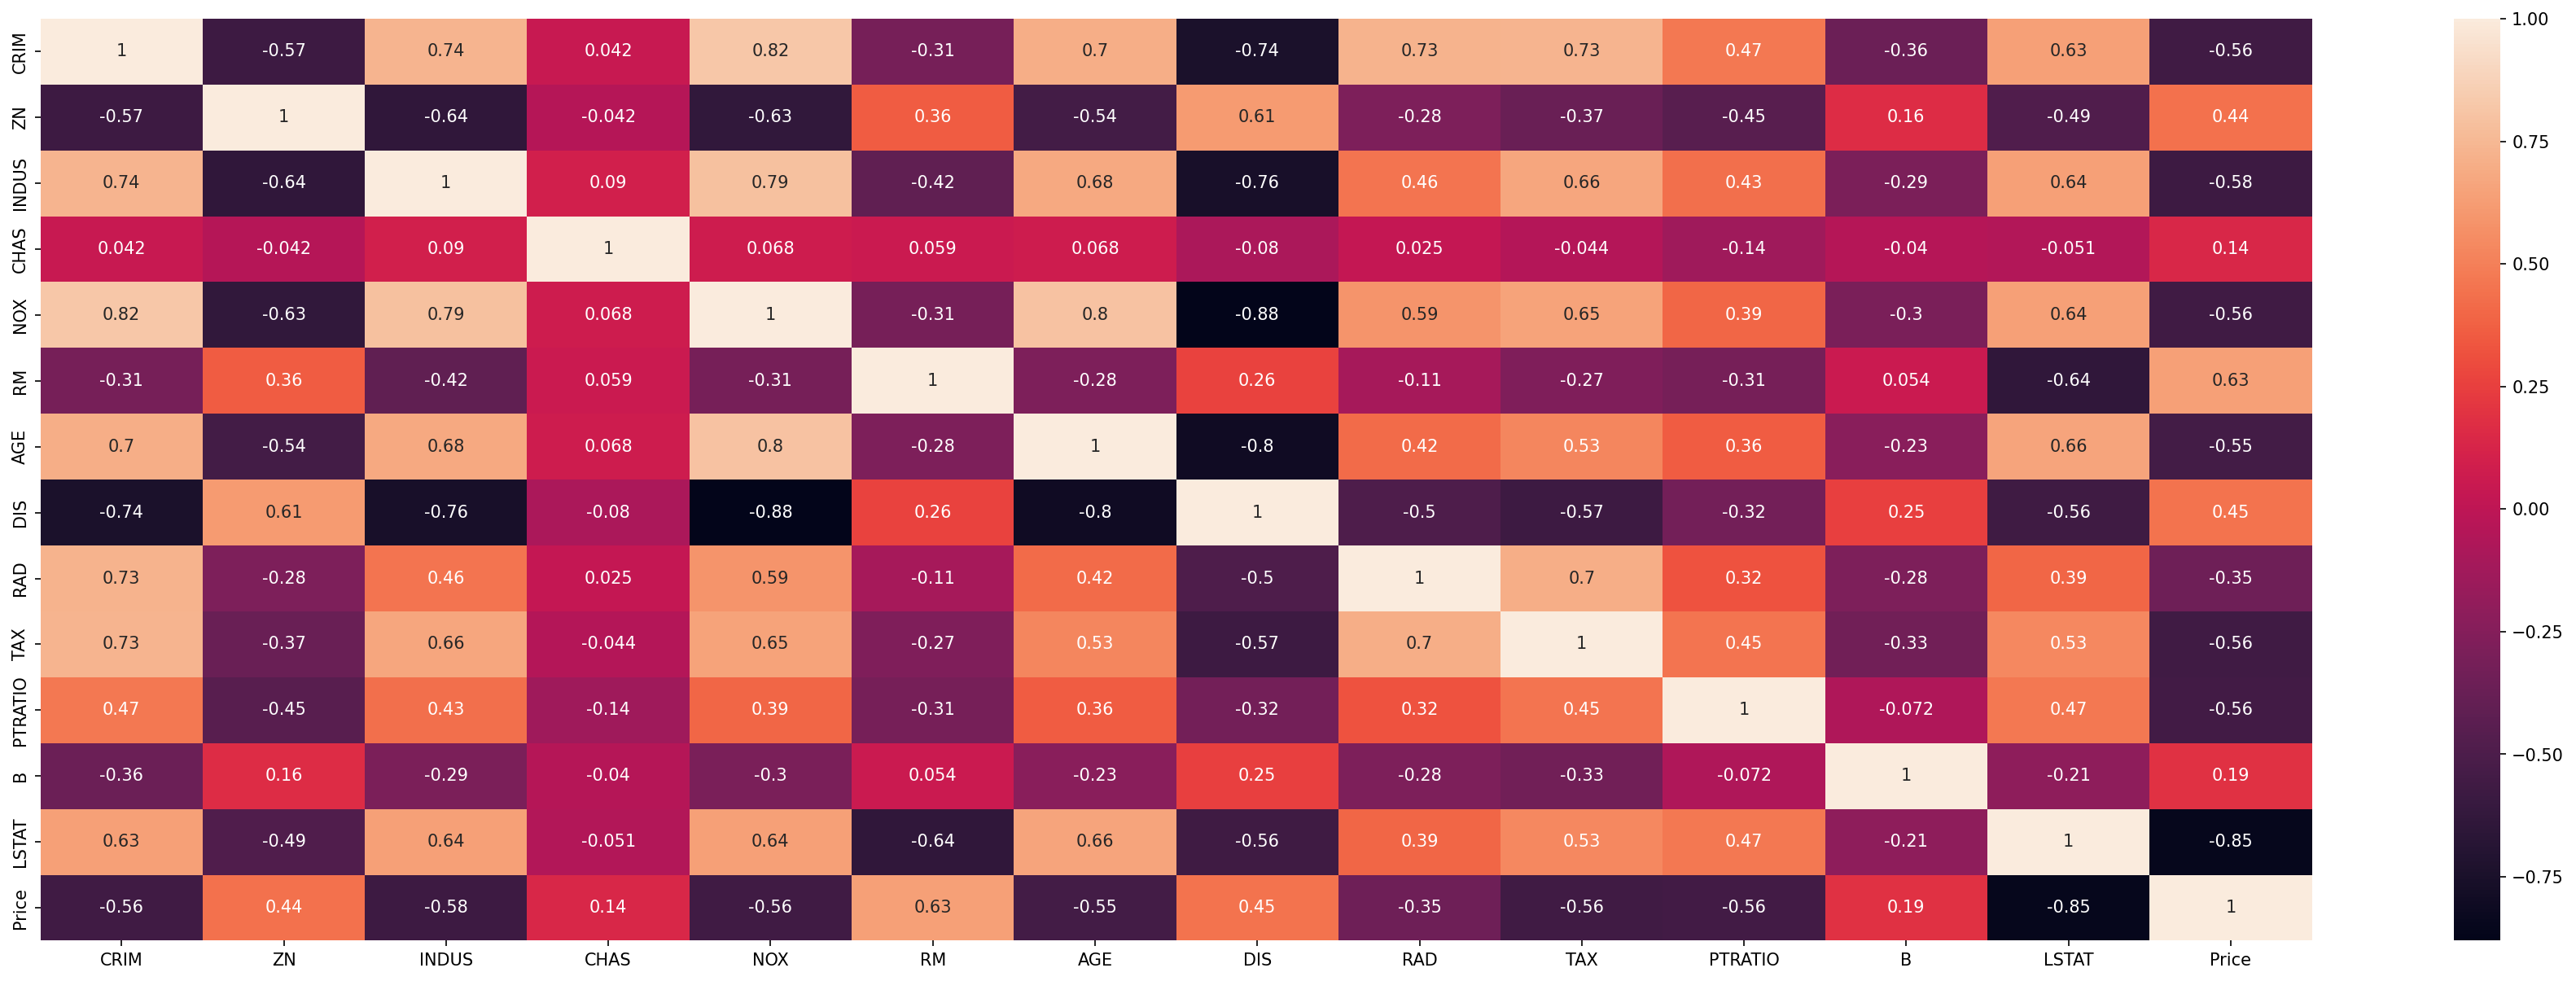

In [14]:
# Melihat korelasi
plt.figure(figsize=(30,10),dpi=150)
sns.heatmap(df.corr('spearman'), annot=True)
plt.show()

Dari data di atas terdapat dapat dilihat nilai yang memiliki korelasi positif namun berada di bawah 0.5 ada di kolom ZN,CHAS,DIS,B dan kolom ini akan di hapus. Selanjutnya dapat dilihat kolom yang memiliki korelasi negatif berapa di bawah -0.5 ada di kolom RAD sehingga kolom ini akan di hapus. Penghapus kolom berguna sebagai feature selection.

In [15]:
# Penghapus kolom
df.drop(columns=['ZN', 'CHAS', 'DIS', 'RAD', 'B'], inplace=True)

# MACHINE LEARNING (Regression Linear)

### 1. Splitting Dataset

In [16]:
# Features / Soal
X = df.drop(columns='Price')

# Target / Jawaban
y = df['Price']

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size= .15, random_state=8)

### 2. Modelling (Regresi Linear)

In [18]:
# Membuat model
Model = LinearRegression(fit_intercept=True)

In [19]:
# Membuat pattern dari soal latihan ke jawaban latihan
Model.fit(X_train,y_train)

LinearRegression()

In [20]:
# Melihat score antara soal ujian dengan jawaban ujian
Model.score(X_train,y_train)

0.6931397182159605

In [21]:
Model.score(X_test, y_test)

0.6362367832355484

In [22]:
# Melihat intercept
Model.intercept_

20.115832202121155

In [23]:
# Melihat coef
Model.coef_

array([-5.45727030e-02,  3.68513224e-02, -4.05892636e+00,  4.47903517e+00,
        2.29732166e-02, -7.41893715e-04, -9.42582049e-01, -5.94321302e-01])

In [24]:
# Membuat sebuah tabel untuk coefien soal latihan
X_train.columns
pd.DataFrame(data = Model.coef_, index = X_train.columns, columns=['Coef'])

,Coef
CRIM,-0.054573
INDUS,0.036851
NOX,-4.058926
RM,4.479035
AGE,0.022973
TAX,-0.000742
PTRATIO,-0.942582
LSTAT,-0.594321


In [25]:
X_train.head()

,CRIM,INDUS,NOX,RM,AGE,TAX,PTRATIO,LSTAT
298,0.06466,2.24,0.400,6.345,20.1,358.0,14.8,4.97
68,0.13554,6.07,0.409,5.594,36.8,345.0,18.9,13.09
496,0.28960,9.69,0.585,5.390,72.9,391.0,19.2,21.14
153,2.14918,19.58,0.871,5.709,98.5,403.0,14.7,15.79
33,1.15172,8.14,0.538,5.701,95.0,307.0,21.0,18.35


### 3. Memprediksi

- Prediksi Training

In [26]:
# prediksi train
pred_train = Model.predict(X_train)

In [27]:
r2_train = r2_score(y_train, pred_train)
r2_train

0.6931397182159605

In [28]:
MAE_train = mean_absolute_error(y_train, pred_train)
MAE_train

3.5661069063499675

In [29]:
MSE_train = mean_squared_error(y_train, pred_train)
MSE_train

26.253368193819682

In [30]:
RMSE_train = np.sqrt(MSE_train)
RMSE_train

5.1238040744957924

In [31]:
print("Hasil Evaluation Matrix untuk Data Training")
print("=" * 50)
print("Nilai R Squared : ", r2_train.round(2))
print("Nilai MAE : ", MAE_train.round(2))
print("Nilai MSE : ", MSE_train.round(2))
print("Nilai RMSE : ", RMSE_train.round(2))

Hasil Evaluation Matrix untuk Data Training
Nilai R Squared :  0.69
Nilai MAE :  3.57
Nilai MSE :  26.25
Nilai RMSE :  5.12


- Prediksi Testing

Dari hasil prediksi di atas terdapat price dengan hasil predict laltihan terbaru ada di 26

In [32]:
# Prediksi test
pred_test = Model.predict(X_test)

In [33]:
r2_test = r2_score(y_test, pred_test)
r2_test

0.6362367832355484

In [34]:
MAE_test = mean_absolute_error(y_test, pred_test)
MAE_test

3.8506530256830644

In [35]:
MSE_test = mean_squared_error(y_test, pred_test)
MSE_test

28.371759325340594

In [36]:
RMSE_test = np.sqrt(MSE_test)
RMSE_test

5.326514744684426

In [37]:
print("Hasil Evaluation Matrix untuk Data Test")
print("=" * 50)
print("Nilai R Squared : ", r2_test.round(2))
print("Nilai MAE : ", MAE_test.round(2))
print("Nilai MSE : ", MSE_test.round(2))
print("Nilai RMSE : ", RMSE_test.round(2))

Hasil Evaluation Matrix untuk Data Test
Nilai R Squared :  0.64
Nilai MAE :  3.85
Nilai MSE :  28.37
Nilai RMSE :  5.33


In [38]:
data = {
    "Training" : [r2_train, MAE_train, MSE_train, RMSE_train],
    "Testing" : [r2_test, MAE_test, MSE_test, RMSE_test]
}

In [39]:
pd.DataFrame(data, index=["R Squared", "MAE", "MSE", "RMSE"])

,Training,Testing
R Squared,0.693140,0.636237
MAE,3.566107,3.850653
MSE,26.253368,28.371759
RMSE,5.123804,5.326515


# IMPROVEMENT MACHINE LEARNING

- POLYNOMIAL FEATURE

In [40]:
from sklearn.preprocessing import PolynomialFeatures

In [41]:
X_train, X_test, y_train,y_test = train_test_split(X,y, train_size=.80, random_state=42)

In [42]:
Poli = PolynomialFeatures(degree=3, include_bias=False, interaction_only=True)

In [43]:
Poli = Poli.fit(X_train)

In [44]:
X_trainPoli = Poli.transform(X_train)
X_testPoli = Poli.transform(X_test)

In [45]:
df_XtrainPoli = pd.DataFrame(X_trainPoli)

In [46]:
df_XtestPoli = pd.DataFrame(X_testPoli)

- Membuat Model Polynomial Regression

In [47]:
Model_PF = LinearRegression()

In [48]:
Model_PF.fit(df_XtrainPoli,y_train)

LinearRegression()

In [49]:
PF_train = Model_PF.predict(df_XtrainPoli)
PF_test = Model_PF.predict(df_XtestPoli)

- Evaluation Matrix Comparison

In [50]:
# Skore Training Set
r2_PF = r2_score(y_train,PF_train)
r2_PF

0.914355581970034

In [51]:
# Skore Training Set
MAE_PF = mean_absolute_error(y_train,PF_train)
MAE_PF

1.9373727268498602

In [52]:
# Skore Training Set
MSE_PF = mean_squared_error(y_train,PF_train)
MSE_PF

7.4402221135558735

In [53]:
# Skore Training Set
RMSE_PF = np.sqrt(MSE_PF)
RMSE_PF

2.7276770544835167

In [54]:
# Skor Testing Set
r2_PF_test = r2_score(y_test,PF_test)
r2_PF_test

0.7521963511844547

In [55]:
# Skor Testing Set
MAE_PF_test = mean_absolute_error(y_test,PF_test)
MAE_PF_test


2.7975351026654836

In [56]:
# Skor Testing Set
MSE_PF_test = mean_squared_error(y_test,PF_test)
MSE_PF_test

18.172379048576023

In [57]:
# Skor Testing Set
RMSE_PF_test = np.sqrt(MSE_PF)
RMSE_PF_test

2.7276770544835167

In [58]:
eva_data = {
    "LinReg Training" : [r2_train, MAE_train, MSE_train, RMSE_train],
    "LinReg Testing" : [r2_test, MAE_test, MSE_test, RMSE_test],
    'Polynomial Training' : [r2_PF, MAE_PF, MSE_PF, RMSE_PF],
    'Polynomial Testing' : [r2_PF_test, MAE_PF_test, MSE_PF_test, RMSE_PF_test]
}
pd.DataFrame(eva_data, index=['R2', 'MAE', 'MSE', 'RMSE'])

,LinReg Training,LinReg Testing,Polynomial Training,Polynomial Testing
R2,0.693140,0.636237,0.914356,0.752196
MAE,3.566107,3.850653,1.937373,2.797535
MSE,26.253368,28.371759,7.440222,18.172379
RMSE,5.123804,5.326515,2.727677,2.727677


# MACHINE LEARNING (RIDGE)

In [59]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [60]:
Model_R = Ridge()

In [61]:
Model_R.fit(df_XtrainPoli,y_train)

Ridge()

In [62]:
R_train = Model_R.predict(df_XtrainPoli)
R_test = Model_R.predict(df_XtestPoli)

In [63]:
# Training dataset
r2_R = r2_score(y_train, R_train) ## R2 dari prediksi Polynomial Features
r2_R

0.9095161729462116

In [64]:
# Training dataset
MAE_R = mean_absolute_error(y_train, R_train)
MAE_R

1.9956045337371355

In [65]:
# Training dataset
MSE_R = mean_squared_error(y_train, R_train)
MSE_R

7.860638047995252

In [66]:
# Training dataset
RMSE_R = np.sqrt(MSE_R)
RMSE_R

2.803682943557501

In [67]:
# Test dataset
r2_R_test = r2_score(y_test, R_test) ## R2 dari prediksi Polynomial Features
r2_R_test

0.7429635768629919

In [68]:
# Test dataset
MAE_R_test = mean_absolute_error(y_test, R_test)
MAE_R_test

2.8030792105099454

In [69]:
# Test dataset
MSE_R_test = mean_squared_error(y_test, R_test)
MSE_R_test

18.849453318634378

In [70]:
# Test Dataset
RMSE_R_test = np.sqrt(MSE_R_test)
RMSE_R_test

4.341595711099132

In [71]:
eva_data = {
    "LinReg Training" : [r2_train, MAE_train, MSE_train, RMSE_train],
    "LinReg Testing" : [r2_test, MAE_test, MSE_test, RMSE_test],
    'Polynomial Training' : [r2_PF, MAE_PF, MSE_PF, RMSE_PF],
    'Polynomial Testing' : [r2_PF_test, MAE_PF_test, MSE_PF_test, RMSE_PF_test],
    'Ridge Training' : [r2_R, MAE_R, MSE_R, RMSE_R],
    'Ridge Testing' : [r2_R_test, MAE_R_test, MSE_R_test, RMSE_R_test]
}
pd.DataFrame(eva_data, index=['R2', 'MAE', 'MSE', 'RMSE'])

,LinReg Training,LinReg Testing,Polynomial Training,Polynomial Testing,Ridge Training,Ridge Testing
R2,0.693140,0.636237,0.914356,0.752196,0.909516,0.742964
MAE,3.566107,3.850653,1.937373,2.797535,1.995605,2.803079
MSE,26.253368,28.371759,7.440222,18.172379,7.860638,18.849453
RMSE,5.123804,5.326515,2.727677,2.727677,2.803683,4.341596
